# Feature Selection from Mobile data using Correlation Heatmap filter method
Dataset: [https://raw.githubusercontent.com/subashgandyer/datasets/main/mobile_price_train.csv]

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/mobile_price_train.csv"

In [3]:
df = pd.read_csv(url)
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Understand the data
- Find how many features?
- Find how many samples?
- What are the data types of each feature column?
- What do you think could be the most important feature(s)?
- Run some feature selection methods
- Is your intuition right?

### Import the necessary libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Read the mobile data

In [16]:
#data = pd.read_csv("data/mobile_price_train.csv")

In [18]:
data = df

### Split the dataset into X and y

In [21]:
X = data.iloc[:,0:20]
y = data.iloc[:,-1] 

### Sanity check

In [24]:
X.shape, y.shape

((2000, 20), (2000,))

### How many features

In [27]:
X.shape[1]

20

### Get correlations of each features in dataset

In [30]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [20, 20]

### Plot heat map

<AxesSubplot:>

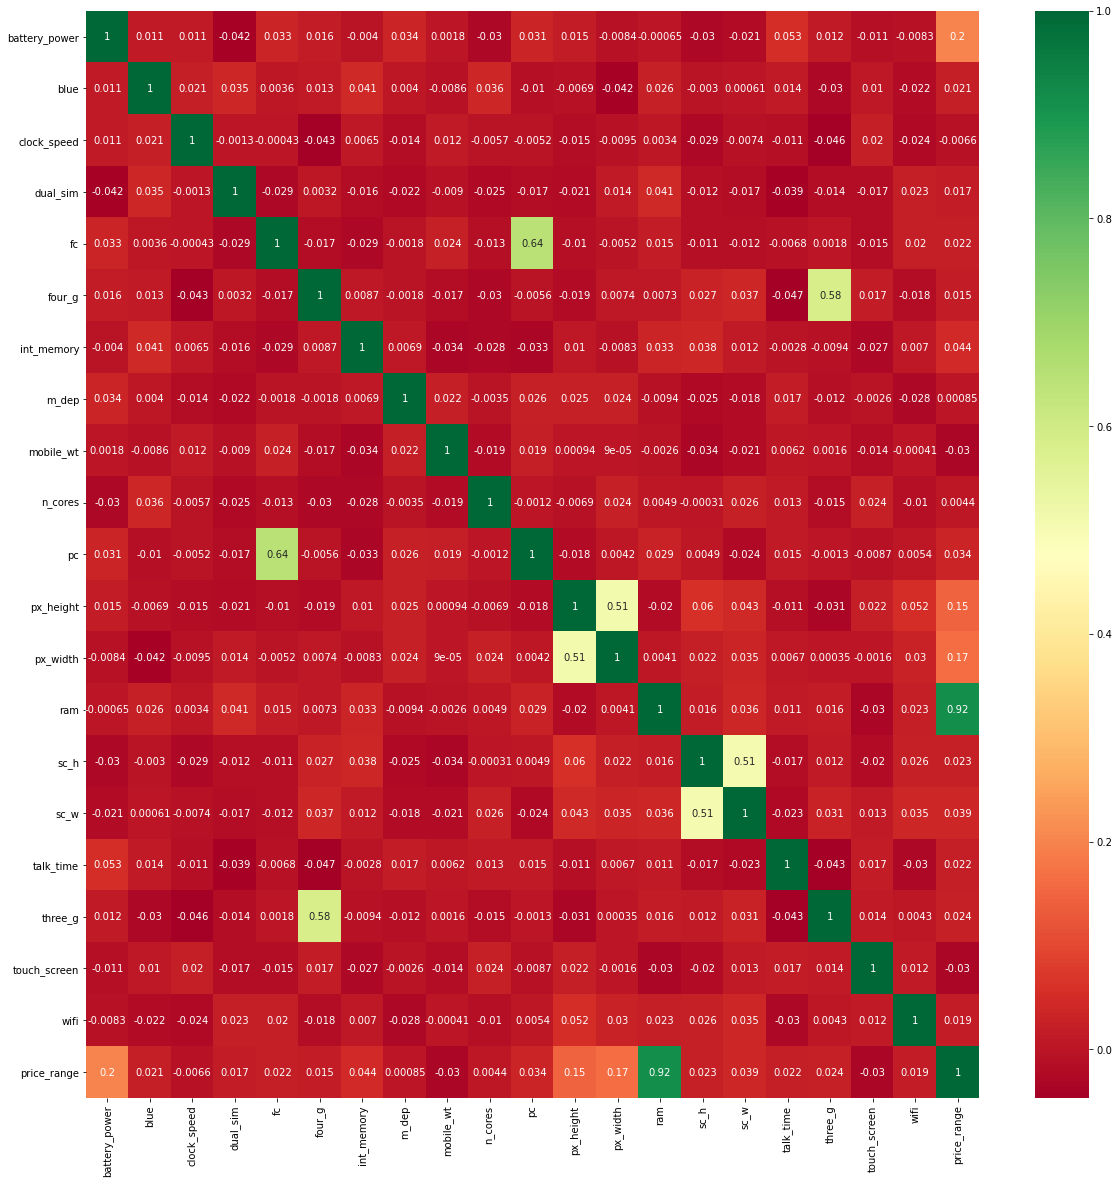

In [31]:
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Top 10 features most correlated with the target (Feature and Correlation Value):
ram: 0.9170
battery_power: 0.2007
px_width: 0.1658
px_height: 0.1489
int_memory: 0.0444
sc_w: 0.0387
pc: 0.0336
touch_screen: 0.0304
mobile_wt: 0.0303
three_g: 0.0236


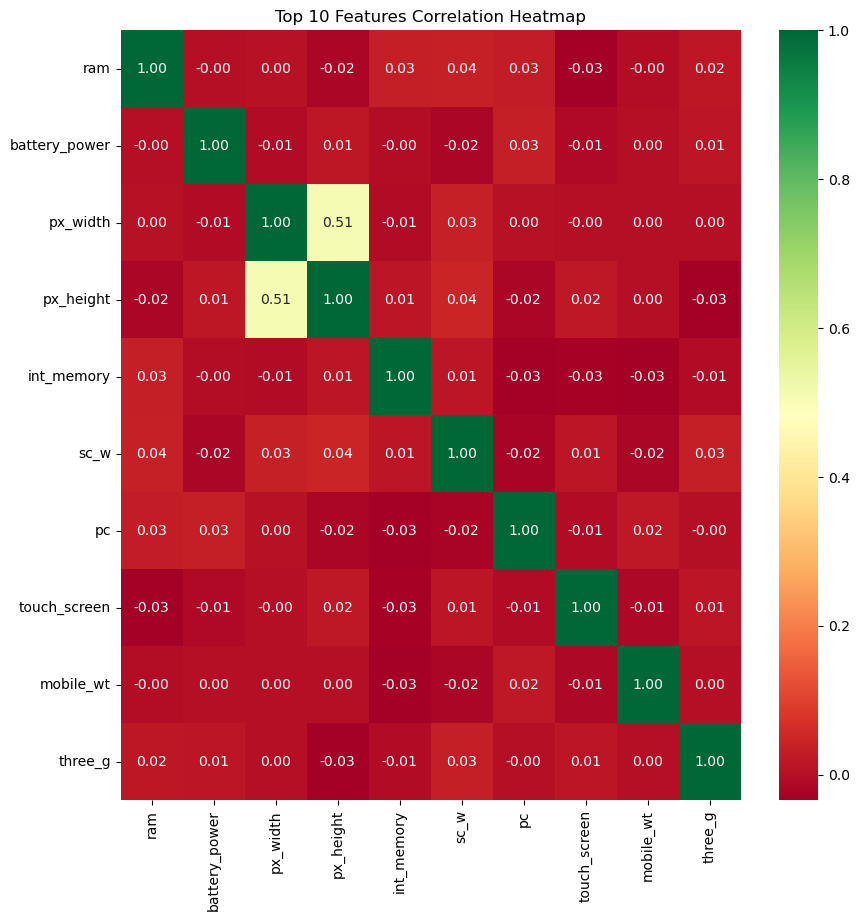

In [56]:
# 計算相關矩陣
corrmat = data.corr()

# 獲取與目標變量的相關係數
target_corr = corrmat[y.name]

# 按相關係數的絕對值排序
top_features = target_corr.abs().sort_values(ascending=False)

# 提取前 10 個特徵（排除目標變量自身）
best_10_features = top_features.index[1:11]
top_10_features = top_features[1:11] 

print("Top 10 features most correlated with the target (Feature and Correlation Value):")
for feature, value in top_10_features.items():
    print(f"{feature}: {value:.4f}")

# 提取這些特徵並繪製熱圖
top_10_corrmat = data[best_10_features].corr()

# 設置熱圖大小
plt.rcParams['figure.figsize'] = [10, 10]

# 繪製熱圖
sns.heatmap(top_10_corrmat, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Top 10 Features Correlation Heatmap")
plt.show()
